In [4]:
import pandas as pd

from google.colab import files
uploaded = files.upload()



Saving train.csv to train (1).csv


In [5]:
df = pd.read_csv("train.csv")
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [6]:
print(df.isnull().sum())


Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


In [7]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# missing num vals
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# missing cat values
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-779927551.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-779927551.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,0
Customer ID,0
Name,0
Gender,0
Age,0
Income (USD),0
Income Stability,0
Profession,0
Type of Employment,0
Location,0
Loan Amount Request (USD),0


In [8]:
cat_cols = [
    "Gender",
    "Income Stability",
    "Profession",
    "Type of Employment",
    "Location",
    "Property Type",
    "Property Location",
    "Co-Applicant"
]


df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()
df_encoded.drop(columns=["Customer ID", "Name", "Property ID", "Expense Type 1", "Expense Type 2", "Has Active Credit Card"], inplace=True)

bool_cols = df_encoded.select_dtypes(include="bool").columns
print(bool_cols)

df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)



Index(['Gender_M', 'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_Maternity leave', 'Profession_Pensioner',
       'Profession_State servant', 'Profession_Student',
       'Profession_Unemployed', 'Profession_Working',
       'Type of Employment_Cleaning staff', 'Type of Employment_Cooking staff',
       'Type of Employment_Core staff', 'Type of Employment_Drivers',
       'Type of Employment_HR staff',
       'Type of Employment_High skill tech staff',
       'Type of Employment_IT staff', 'Type of Employment_Laborers',
       'Type of Employment_Low-skill Laborers', 'Type of Employment_Managers',
       'Type of Employment_Medicine staff',
       'Type of Employment_Private service staff',
       'Type of Employment_Realty agents', 'Type of Employment_Sales staff',
       'Type of Employment_Secretaries', 'Type of Employment_Security staff',
       'Type of Employment_Waiters/barmen staff', 'Location_Semi-Urban',
       'Location_Urban', 'Property Type_

In [9]:
# feature splitting and scaling

from sklearn.preprocessing import StandardScaler

num_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop("Loan Sanction Amount (USD)")

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
print(df_encoded.head())

y = df_encoded["Loan Sanction Amount (USD)"]
X_scaled = df_encoded.drop("Loan Sanction Amount (USD)", axis=1)


        Age  Income (USD)  Loan Amount Request (USD)  \
0  0.991451     -0.061266                  -0.269027   
1 -0.504355      0.229972                  -0.705269   
2  1.552379     -0.152389                  -0.726171   
3  1.552379     -0.033357                  -0.147279   
4 -0.566680      0.004480                   0.420461   

   Current Loan Expenses (USD)  Dependents  Credit Score  No. of Defaults  \
0                    -0.660358    0.840776      0.992493        -0.490502   
1                     0.392886   -1.348745      0.578136        -0.490502   
2                    -0.946193   -1.348745      1.330799        -0.490502   
3                    -0.422775   -0.253984      1.324379         2.038728   
4                     0.374693   -0.253984      0.080879         2.038728   

   Property Age  Property Price  Loan Sanction Amount (USD)  ...  \
0     -0.060969       -0.126419                    54607.18  ...   
1      0.230298       -0.822772                    37469.98  ...

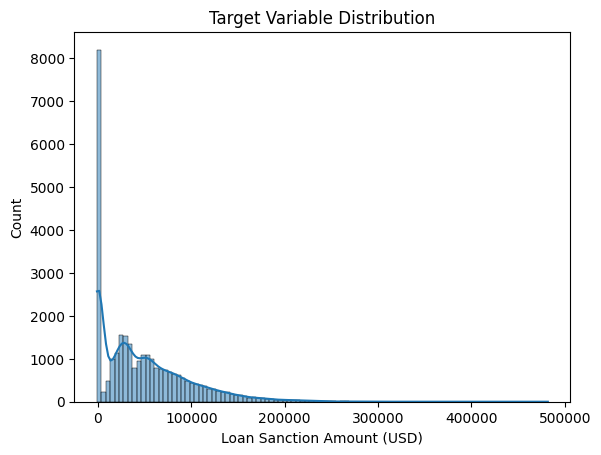

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

if not os.path.exists('figures'):
    os.makedirs('figures')

sns.histplot(y, kde=True)
plt.title("Target Variable Distribution")
plt.savefig('figures/target_variable_distribution.png')
plt.show()

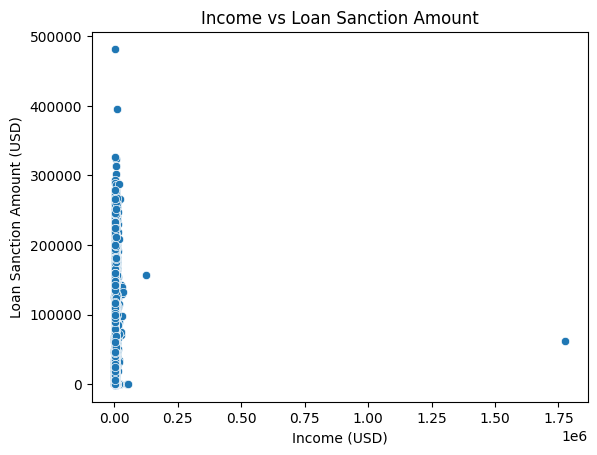

In [11]:
sns.scatterplot(x=df["Income (USD)"], y=y)
plt.title("Income vs Loan Sanction Amount")
plt.savefig('figures/income_vs_loan_sanction_amount.png')
plt.show()

In [12]:
# baseline model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr = LinearRegression()

start = time.time()
lr.fit(X_train, y_train)
train_time_lr = time.time() - start

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print(f"MAE  : {mae_lr:.2f}")
print(f"MSE  : {mse_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R2   : {r2_lr:.4f}")
print(f"Training Time (s): {train_time_lr:.4f}")


Linear Regression Performance
MAE  : 19691.34
MSE  : 903909024.36
RMSE : 30065.08
R2   : 0.6071
Training Time (s): 0.0597


In [13]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()

ridge_grid = GridSearchCV(
    ridge, ridge_params, cv=5, scoring="r2", return_train_score=True

)

start = time.time()
ridge_grid.fit(X_train, y_train)
train_time_ridge = time.time() - start

y_pred = ridge_grid.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Ridge Alpha:", ridge_grid.best_params_)

print("\nRidge Regression Performance")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.4f}")
print(f"Training Time (s): {train_time_ridge:.4f}")


Best Ridge Alpha: {'alpha': 0.01}

Ridge Regression Performance
MAE  : 19691.32
MSE  : 903893055.15
RMSE : 30064.81
R2   : 0.6071
Training Time (s): 1.2507


In [14]:
# Lasso Regression

lasso_params = {"alpha": [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso(max_iter=5000)

lasso_grid = GridSearchCV(
    lasso, lasso_params, cv=5, scoring="r2", return_train_score=True

)

start = time.time()
lasso_grid.fit(X_train, y_train)
train_time_lasso = time.time() - start

y_pred = lasso_grid.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Lasso Alpha:", lasso_grid.best_params_)

print("Lasso Regression Performance")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.4f}")
print(f"Training Time (s): {train_time_lasso:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+12, tolerance: 4.429e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.753e+12, tolerance: 4.402e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.960e+12, tolerance: 4.412e

Best Lasso Alpha: {'alpha': 0.1}
Lasso Regression Performance
MAE  : 19691.05
MSE  : 903651370.56
RMSE : 30060.79
R2   : 0.6072
Training Time (s): 146.8492


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.679e+12, tolerance: 5.521e+09
  model = cd_fast.enet_coordinate_descent(


In [15]:
# Elastic Net Regression

enet_params = {
    "alpha": [0.01, 0.1, 1, 10],
    "l1_ratio": [0.2, 0.5, 0.8]
}

enet = ElasticNet(max_iter=5000)

enet_grid = GridSearchCV(
    enet, enet_params, cv=5, scoring="r2", return_train_score=True
)

start = time.time()
enet_grid.fit(X_train, y_train)
train_time_enet = time.time() - start

y_pred = enet_grid.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Elastic Net Params:", enet_grid.best_params_)

print("\nElastic Net Regression Performance")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.4f}")
print(f"Training Time (s): {train_time_enet:.4f}")


Best Elastic Net Params: {'alpha': 0.01, 'l1_ratio': 0.8}

Elastic Net Regression Performance
MAE  : 19696.56
MSE  : 893480070.26
RMSE : 29891.14
R2   : 0.6116
Training Time (s): 51.0812


**SVM Regressor**

In [16]:
# rbf kernel

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.5, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

y_pred_rbf = svr_rbf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rbf)
mse = mean_squared_error(y_test, y_pred_rbf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rbf)
print("\nSVM (rbf) Regression Performance")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.4f}")



SVM (rbf) Regression Performance
MAE  : 36547.19
MSE  : 2441453164.14
RMSE : 49411.06
R2   : -0.0612


In [17]:
# linear kernel

from sklearn.svm import SVR

svr_linear = SVR(kernel='linear', C=100, gamma=0.5, epsilon=0.1)
svr_linear.fit(X_train, y_train)

y_pred_linear = svr_linear.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)
print("\nSVM (linear) Regression Performance")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.4f}")



SVM (linear) Regression Performance
MAE  : 16160.38
MSE  : 991854810.65
RMSE : 31493.73
R2   : 0.5689


**Regularized Regression vs SVM Regressor**

Naive Bayes model results stored in nb_results dictionary:
{'Ridge Regression': {'MAE': 19691.32, 'MSE': 903893055.15, 'RMSE': 30064.81, 'R2': 0.6071}, 'Lasso Regression': {'MAE': 19691.05, 'MSE': 903651370.56, 'RMSE': 30060.79, 'R2': 0.6072}, 'Elastic Net Regression': {'MAE': 19696.56, 'MSE': 893480070.26, 'RMSE': 29891.14, 'R2': 0.6116}, 'SVM rbf Regressor': {'MAE': 36547.19, 'MSE': 2441453164.14, 'RMSE': 49411.06, 'R2': -0.0612}, 'SVM linear Regressor': {'MAE': 16160.38, 'MSE': 991854810.65, 'RMSE': 31493.73, 'R2': 0.5689}}


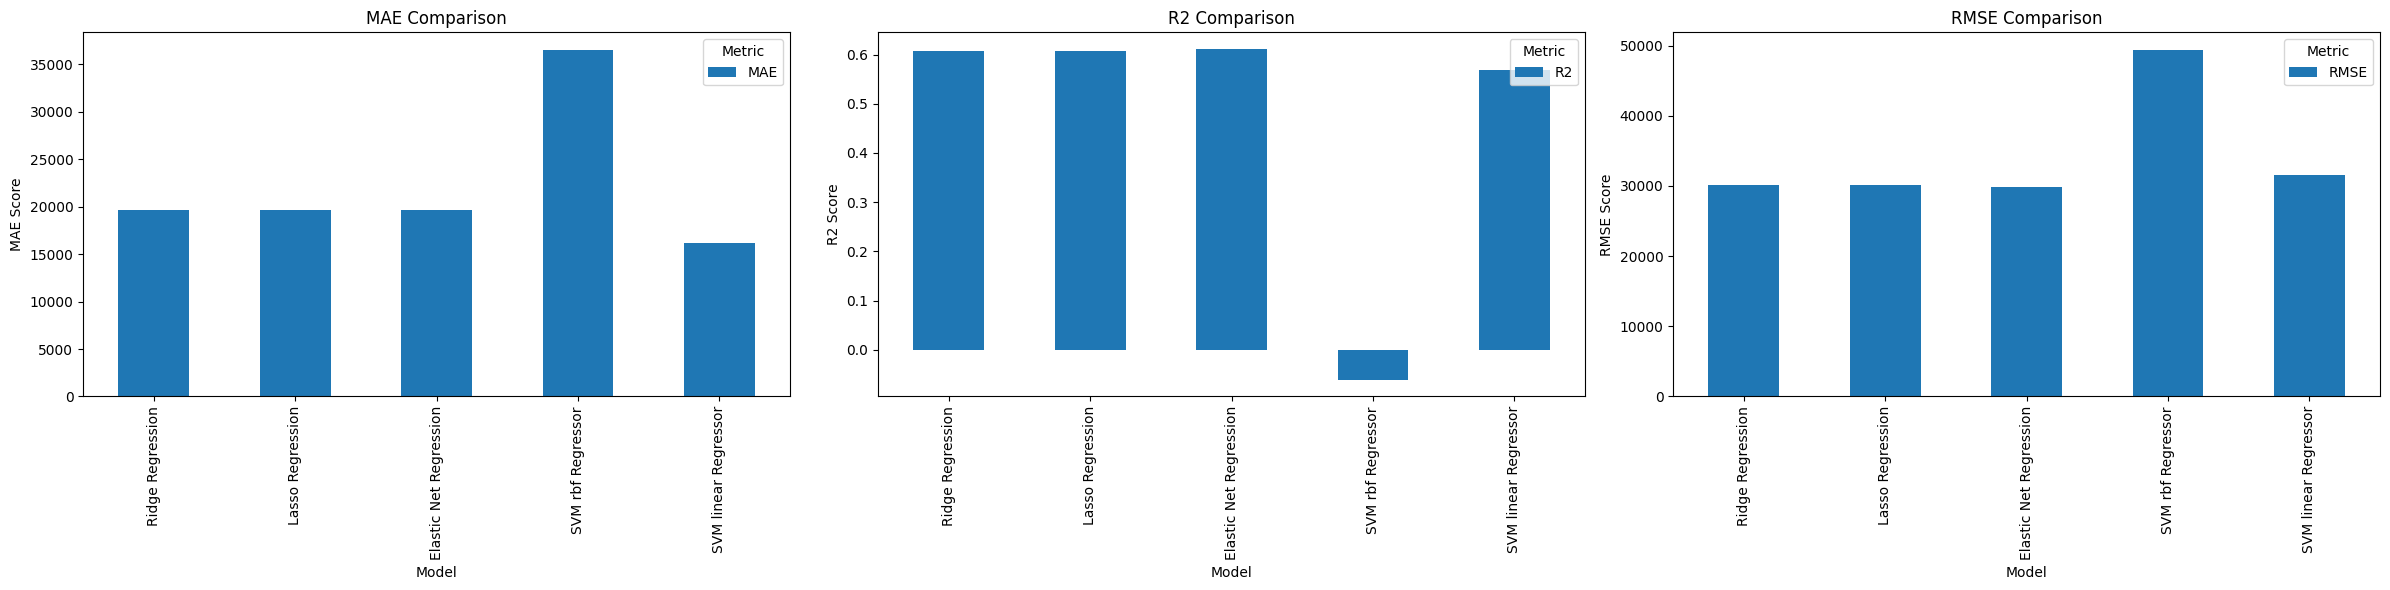

In [18]:
nb_results = {
    "Ridge Regression": {
        "MAE"  : 19691.32,
        "MSE"  : 903893055.15,
        "RMSE" : 30064.81,
        "R2"   : 0.6071
    },
    "Lasso Regression": {
        "MAE"  : 19691.05,
        "MSE"  : 903651370.56,
        "RMSE" : 30060.79,
        "R2"   : 0.6072
    },
    "Elastic Net Regression": {
        "MAE"  : 19696.56,
        "MSE"  : 893480070.26,
        "RMSE" : 29891.14,
        "R2"   : 0.6116
    },
    "SVM rbf Regressor": {
        "MAE"  : 36547.19,
        "MSE"  : 2441453164.14,
        "RMSE" : 49411.06,
        "R2"   : -0.0612
    },
    "SVM linear Regressor": {
        "MAE"  : 16160.38,
        "MSE"  : 991854810.65,
        "RMSE" : 31493.73,
        "R2"   : 0.5689
    }
}

print("Naive Bayes model results stored in nb_results dictionary:")
print(nb_results)

metrics_df = pd.DataFrame(nb_results).T

plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
metrics_df[['MAE']].plot(kind='bar', ax=plt.gca())
plt.title('MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE Score')
plt.legend(title='Metric')

plt.subplot(1, 3, 2)
metrics_df[['R2']].plot(kind='bar', ax=plt.gca())
plt.title('R2 Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.legend(title='Metric')

plt.subplot(1, 3, 3)
metrics_df[['RMSE']].plot(kind='bar', ax=plt.gca())
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.legend(title='Metric')

plt.tight_layout()
plt.savefig('figures/LR_vs_SVM_performance_metrics_comparison.png')
plt.show()

**Visualizations**

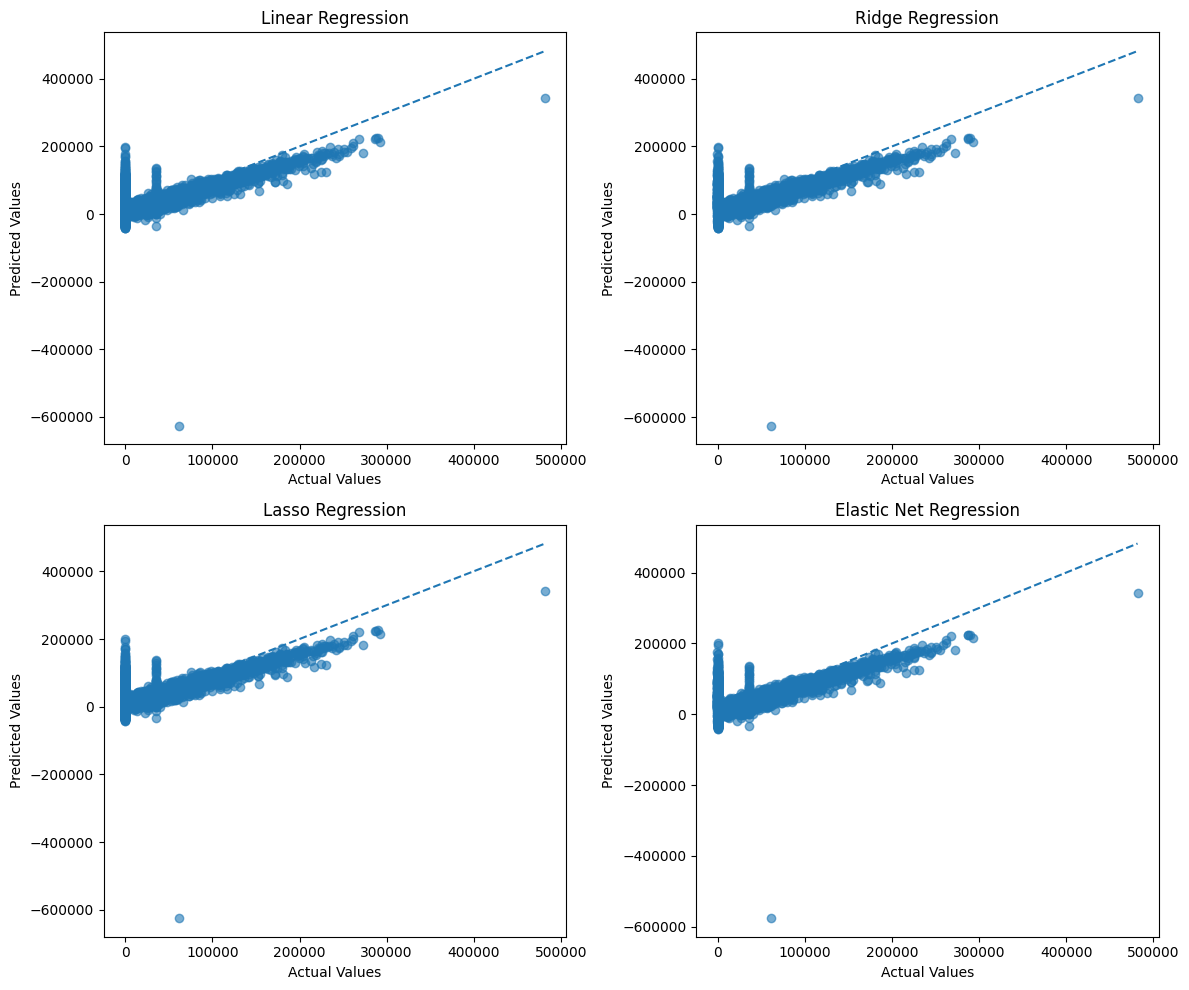

In [19]:
import matplotlib.pyplot as plt

models = {
    "Linear": lr,
    "Ridge": ridge_grid.best_estimator_,
    "Lasso": lasso_grid.best_estimator_,
    "Elastic Net": enet_grid.best_estimator_
}

plt.figure(figsize=(12,10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)

    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        linestyle="--"
    )
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} Regression")

plt.tight_layout()
plt.savefig('figures/actual_vs_predicted_plots.png')
plt.show()

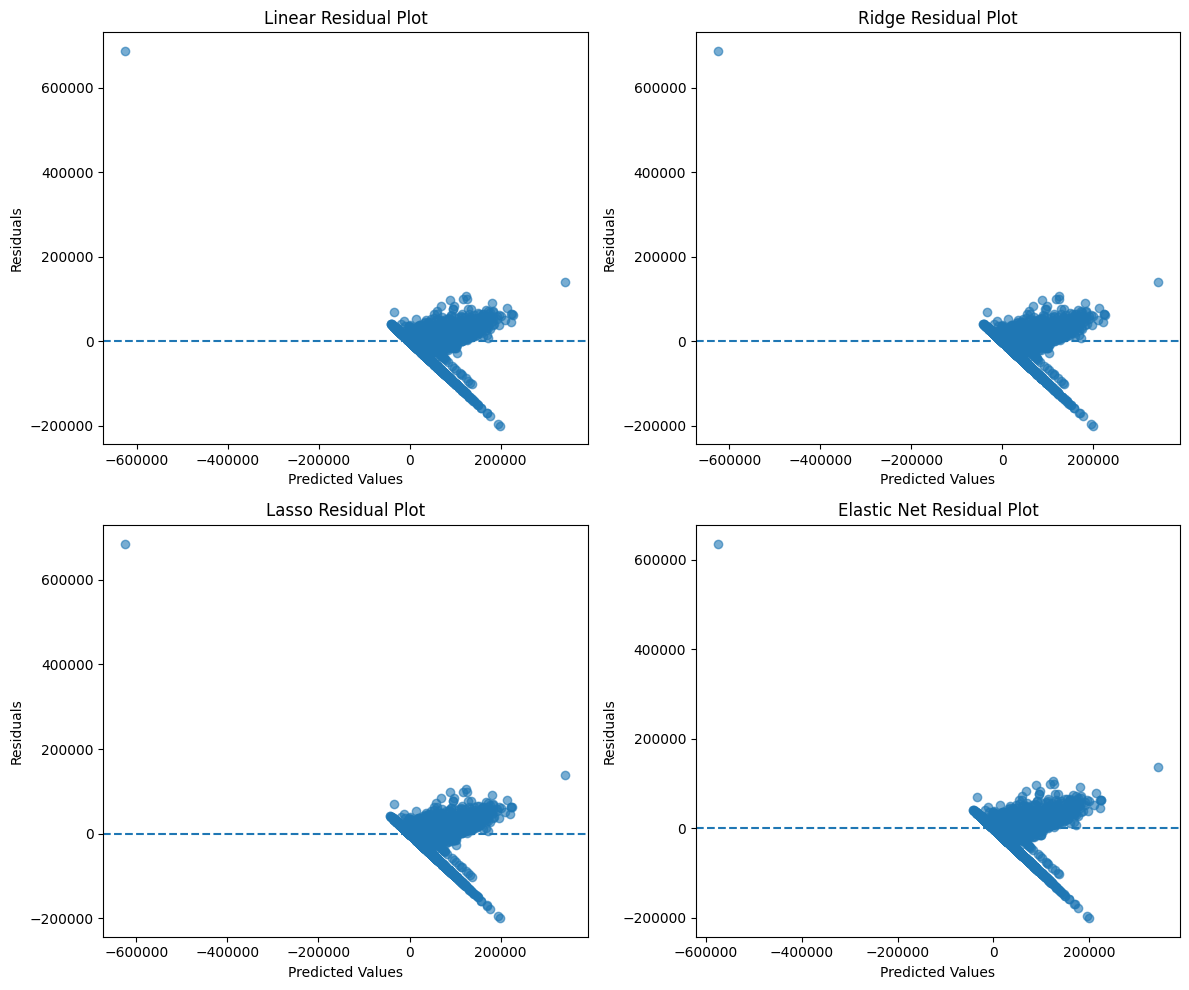

In [20]:
import matplotlib.pyplot as plt

models = {
    "Linear": lr,
    "Ridge": ridge_grid.best_estimator_,
    "Lasso": lasso_grid.best_estimator_,
    "Elastic Net": enet_grid.best_estimator_
}

plt.figure(figsize=(12,10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.subplot(2, 2, i)
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{name} Residual Plot")

plt.tight_layout()
plt.savefig('figures/residual_plots.png')
plt.show()

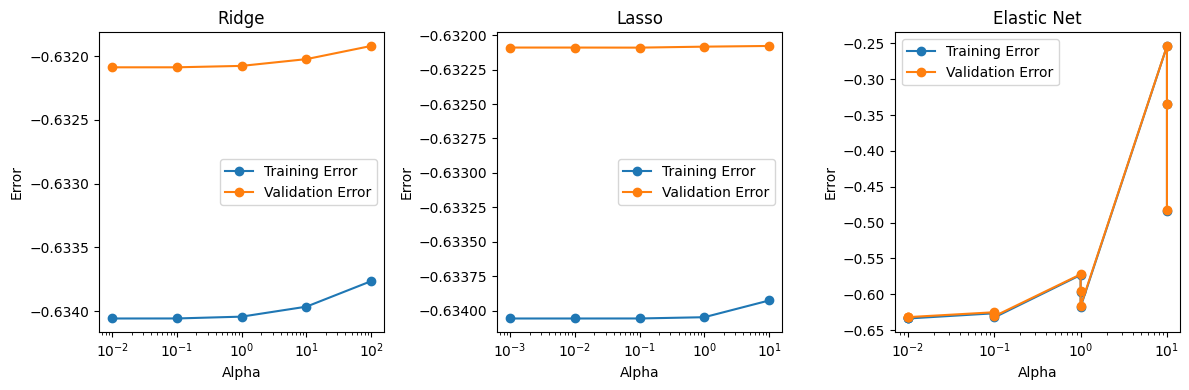

In [21]:
plt.figure(figsize=(12,4))

# Ridge
plt.subplot(1, 3, 1)
plt.plot(
    ridge_grid.cv_results_["param_alpha"].data,
    -ridge_grid.cv_results_["mean_train_score"],
    marker="o",
    label="Training Error"
)
plt.plot(
    ridge_grid.cv_results_["param_alpha"].data,
    -ridge_grid.cv_results_["mean_test_score"],
    marker="o",
    label="Validation Error"
)
plt.xscale("log")
plt.title("Ridge")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()

# Lasso
plt.subplot(1, 3, 2)
plt.plot(
    lasso_grid.cv_results_["param_alpha"].data,
    -lasso_grid.cv_results_["mean_train_score"],
    marker="o",
    label="Training Error"
)
plt.plot(
    lasso_grid.cv_results_["param_alpha"].data,
    -lasso_grid.cv_results_["mean_test_score"],
    marker="o",
    label="Validation Error"
)
plt.xscale("log")
plt.title("Lasso")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()

# Elastic Net
plt.subplot(1, 3, 3)
plt.plot(
    enet_grid.cv_results_["param_alpha"].data,
    -enet_grid.cv_results_["mean_train_score"],
    marker="o",
    label="Training Error"
)
plt.plot(
    enet_grid.cv_results_["param_alpha"].data,
    -enet_grid.cv_results_["mean_test_score"],
    marker="o",
    label="Validation Error"
)
plt.xscale("log")
plt.title("Elastic Net")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()

plt.tight_layout()
plt.savefig('figures/hyperparameter_tuning_errors.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

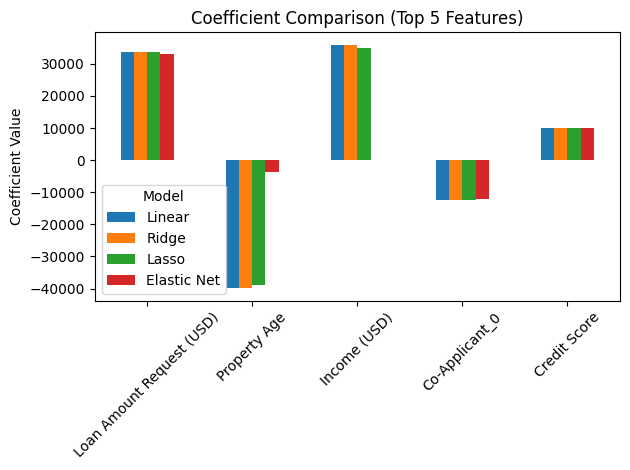

Top 5 Feature Coefficients (Across Models):
                               Linear       Ridge       Lasso  Elastic Net
Loan Amount Request (USD)  33736.0401  33735.9017  33733.6549   33028.5795
Property Age              -39933.4501 -39780.5314 -38959.2778   -3681.8902
Income (USD)               35999.4885  35846.9559  35031.6577      34.6014
Co-Applicant_0            -12514.8535 -12514.7160 -12510.2527  -11976.1101
Credit Score               10083.6622  10083.6355  10083.6557   10070.7799


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

if not os.path.exists('figures'):
    os.makedirs('figures')

coef_df = pd.DataFrame({
    "Linear": lr.coef_,
    "Ridge": ridge_grid.best_estimator_.coef_,
    "Lasso": lasso_grid.best_estimator_.coef_,
    "Elastic Net": enet_grid.best_estimator_.coef_
}, index=X_scaled.columns)

# Mean absolute value across models to find important features
top_features = coef_df.abs().mean(axis=1).sort_values(ascending=False).head(5).index

coef_top = coef_df.loc[top_features]

plt.figure(figsize=(12,6))
coef_top.plot(kind="bar")
plt.title("Coefficient Comparison (Top 5 Features)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.savefig('figures/coefficient_comparison_top_features.png')
plt.show()

coef_table = coef_top.round(4)
print("Top 5 Feature Coefficients (Across Models):")
print(coef_table)
